# Sequential fit

In [1]:
import pymultipleis.multieis as pym

In [2]:
import numpy as onp
import jax.numpy as jnp

In [3]:
# Load the file containing the frequencies
F = jnp.asarray(onp.load('../../../data/redox_exp_50/freq_50.npy'))
# Load the file containing the admittances (a set of 50 spectra)
Y = jnp.asarray(onp.load('../../../data/redox_exp_50/Y_50.npy'))
# Load the file containing the standard deviation of the admittances
Yerr = jnp.asarray(onp.load('../../../data/redox_exp_50/sigma_Y_50.npy'))

In [4]:
print(F.shape)
print(Y.shape)

(45,)
(45, 50)


In [5]:
def redox(p, f):
    w = 2*jnp.pi*f               # Angular frequency
    s = 1j*w                       # Complex variable
    Rs = p[0]
    Qh = p[1]
    nh = p[2]
    Rct = p[3]
    Wct = p[4]
    Rw = p[5]
    Zw = Wct/jnp.sqrt(w) * (1-1j) # Planar infinite length Warburg impedance
    Ydl = (s**nh)*Qh                # admittance of a CPE
    Z1 = (1/Zw + 1/Rw)**-1
    Z2 = (Rct+Z1)
    Y2 = Z2**-1
    Y3 = (Ydl + Y2)
    Z3 = 1/Y3
    Z = Rs + Z3
    Y = 1/Z
    return jnp.concatenate((Y.real, Y.imag), axis = 0)



In [6]:
p0 = jnp.asarray([1.6295e+02, 3.0678e-08, 9.3104e-01, 1.1865e+04, 4.7125e+05, 1.3296e+06])

bounds = [[1e-15,1e15], [1e-9, 1e2], [1e-1,1e0], [1e-15,1e15], [1e-15,1e15], [1e-15,1e15]]

smf_sigma = jnp.asarray([100000., 100000., 100000., 100000., 100000., 100000.]) # Smoothing factor used with the standard deviation

smf_modulus = jnp.asarray([1., 1., 1., 1., 1., 1.]) # Smoothing factor used with the modulus

labels = {"Rs":"$\Omega$", "Qh":"$F^{nh}$", "nh":"-", "Rct":"$\Omega$", "Wct":"$\Omega\cdot s^{-0.5}$", "Rw":"$\Omega$"}

In [7]:
eis_redox_sequential = pym.Multieis(p0, F, Y, bounds, smf_modulus, redox, weight= 'modulus', immittance='admittance')

1. Fitting a subset of the sequence

In [8]:
popt, perr, chisqr, chitot, AIC = eis_redox_sequential.fit_sequential(indices=[1, 2, 15, 25, 45])


Using initial
fitting spectra 1

Optimization complete
total time is 0:00:13.993434 

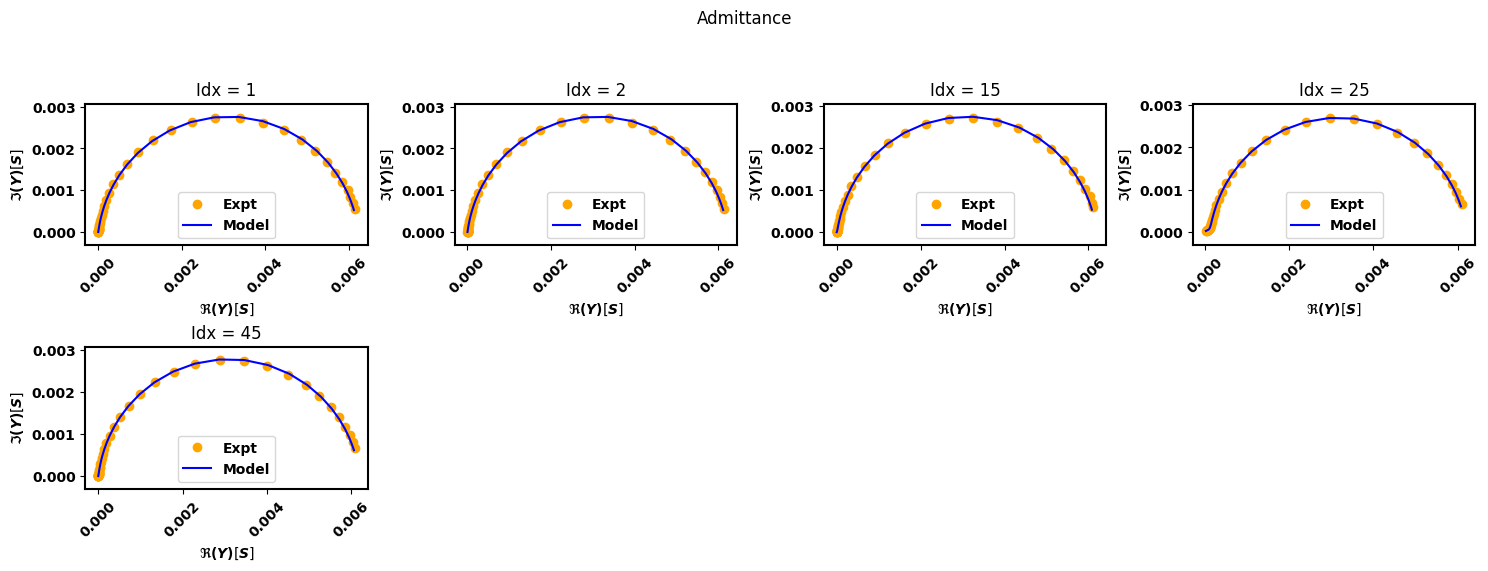

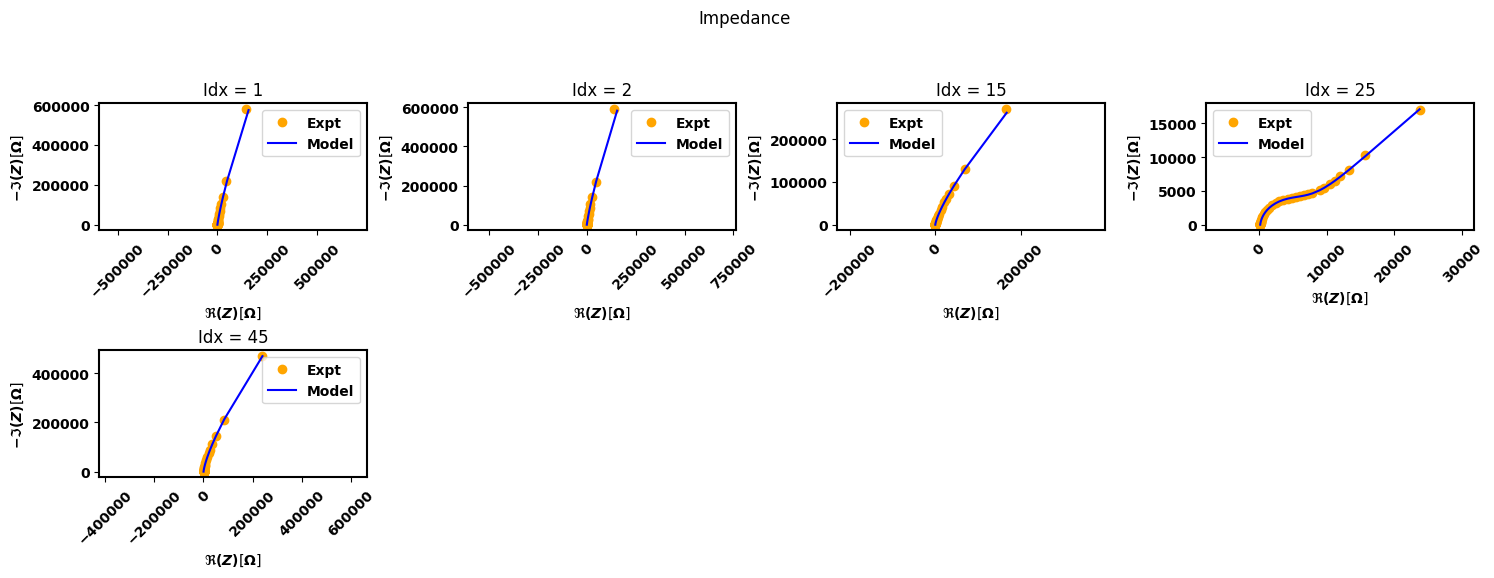

In [9]:
eis_redox_sequential.plot_nyquist()

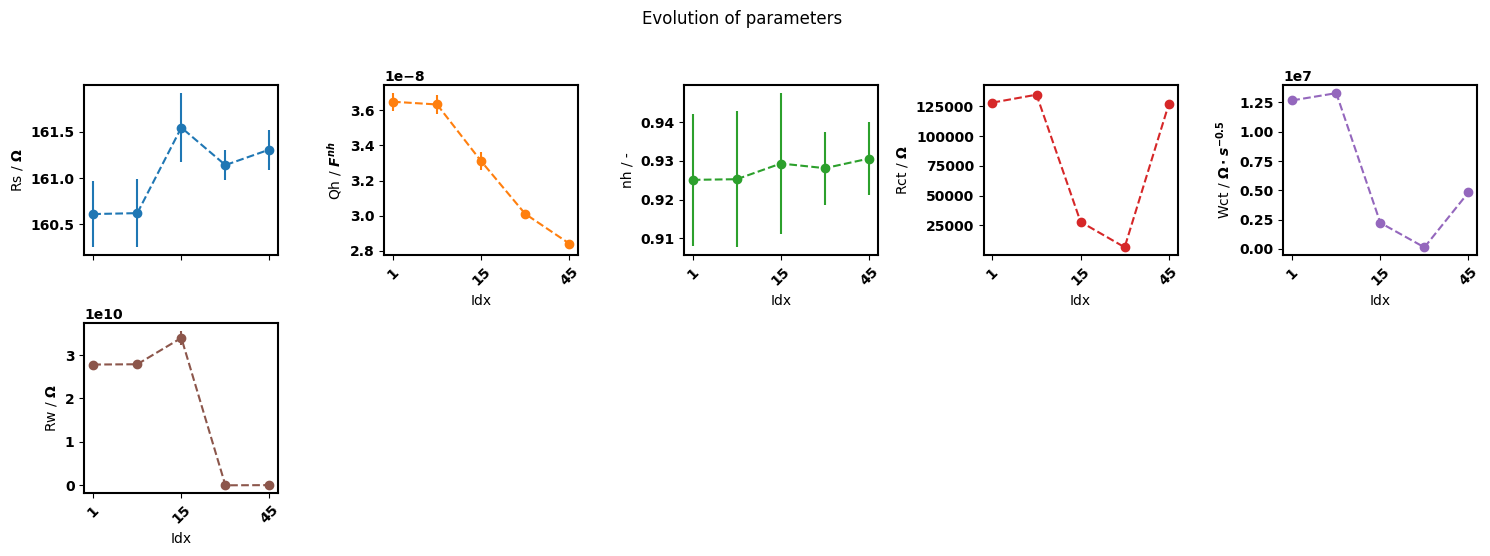

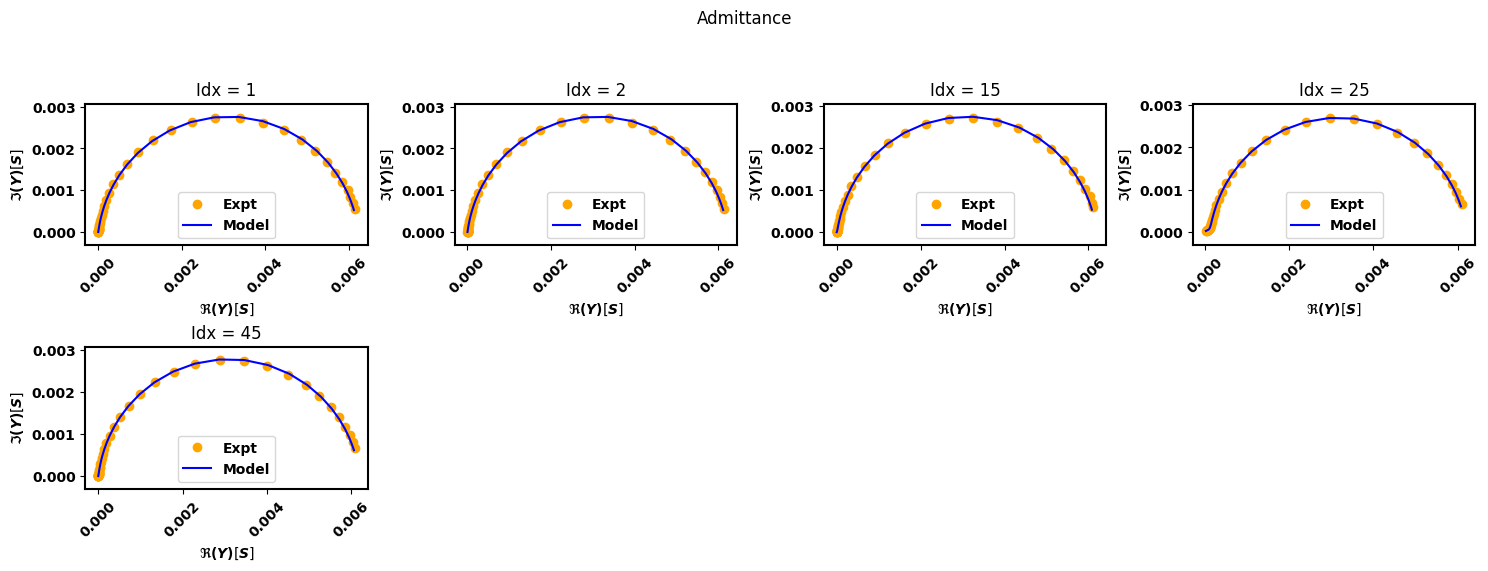

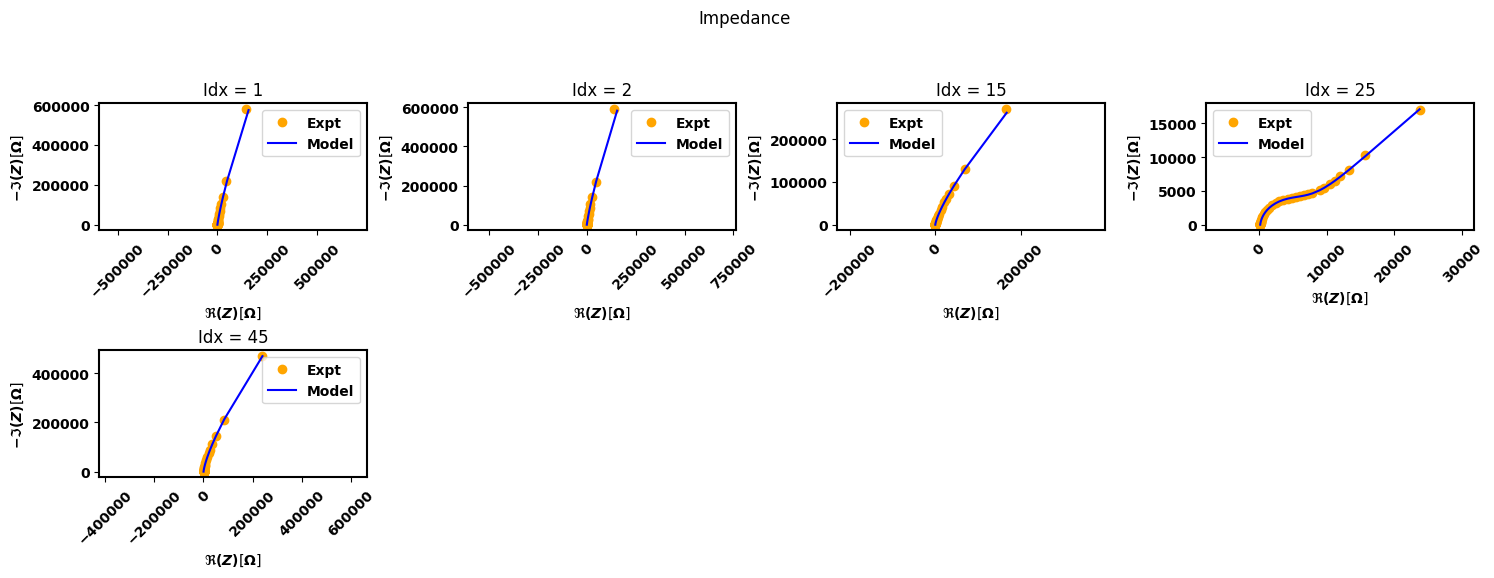

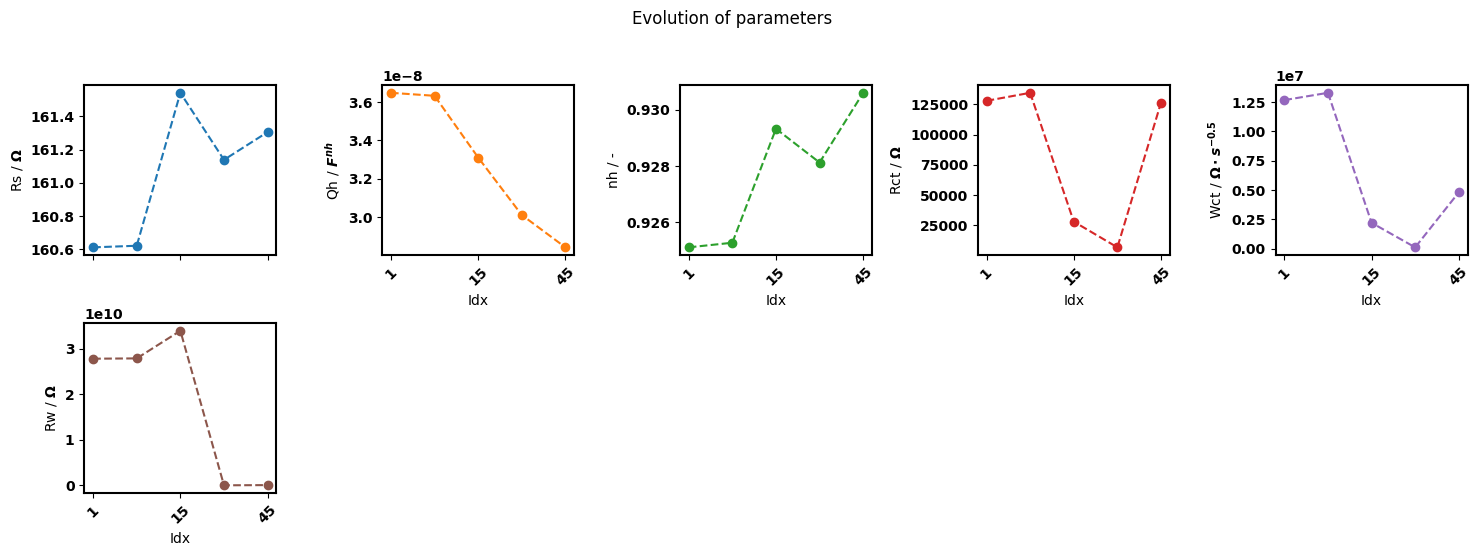

In [10]:
eis_redox_sequential.plot_params(show_errorbar = True, labels = labels)

eis_redox_sequential.plot_nyquist()

eis_redox_sequential.plot_params(False, labels = labels)

2. Sequential fit with all spectra

In [11]:
popt, perr, chisqr, chitot, AIC = eis_redox_sequential.fit_sequential(indices=None)
eis_redox_sequential.plot_nyquist(steps = 10)
eis_redox_sequential.plot_params(False, labels = labels)
eis_redox_sequential.plot_params(show_errorbar = True, labels = labels)


Using initial
fitting spectra 0
